In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
from sklearn import svm
from keras.layers import Dense,BatchNormalization,Dropout,LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,classification_report

In [6]:
data_df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [7]:
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


[Text(0, 0, '203'), Text(0, 0, '96')]

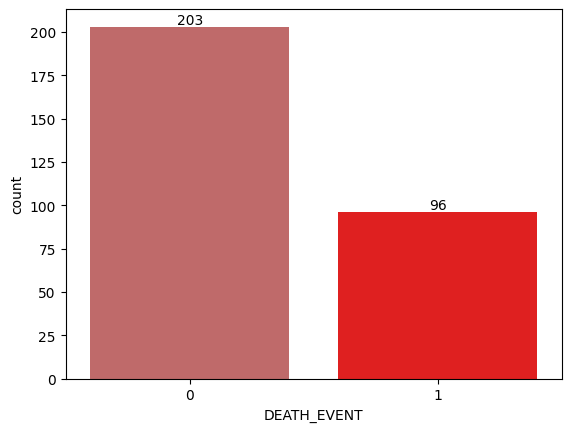

In [10]:
cols=["#CD5C5C","#FF0000"]
ax=sns.countplot(x=data_df["DEATH_EVENT"],palette=cols)
ax.bar_label(ax.containers[0])

In [11]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<AxesSubplot: >

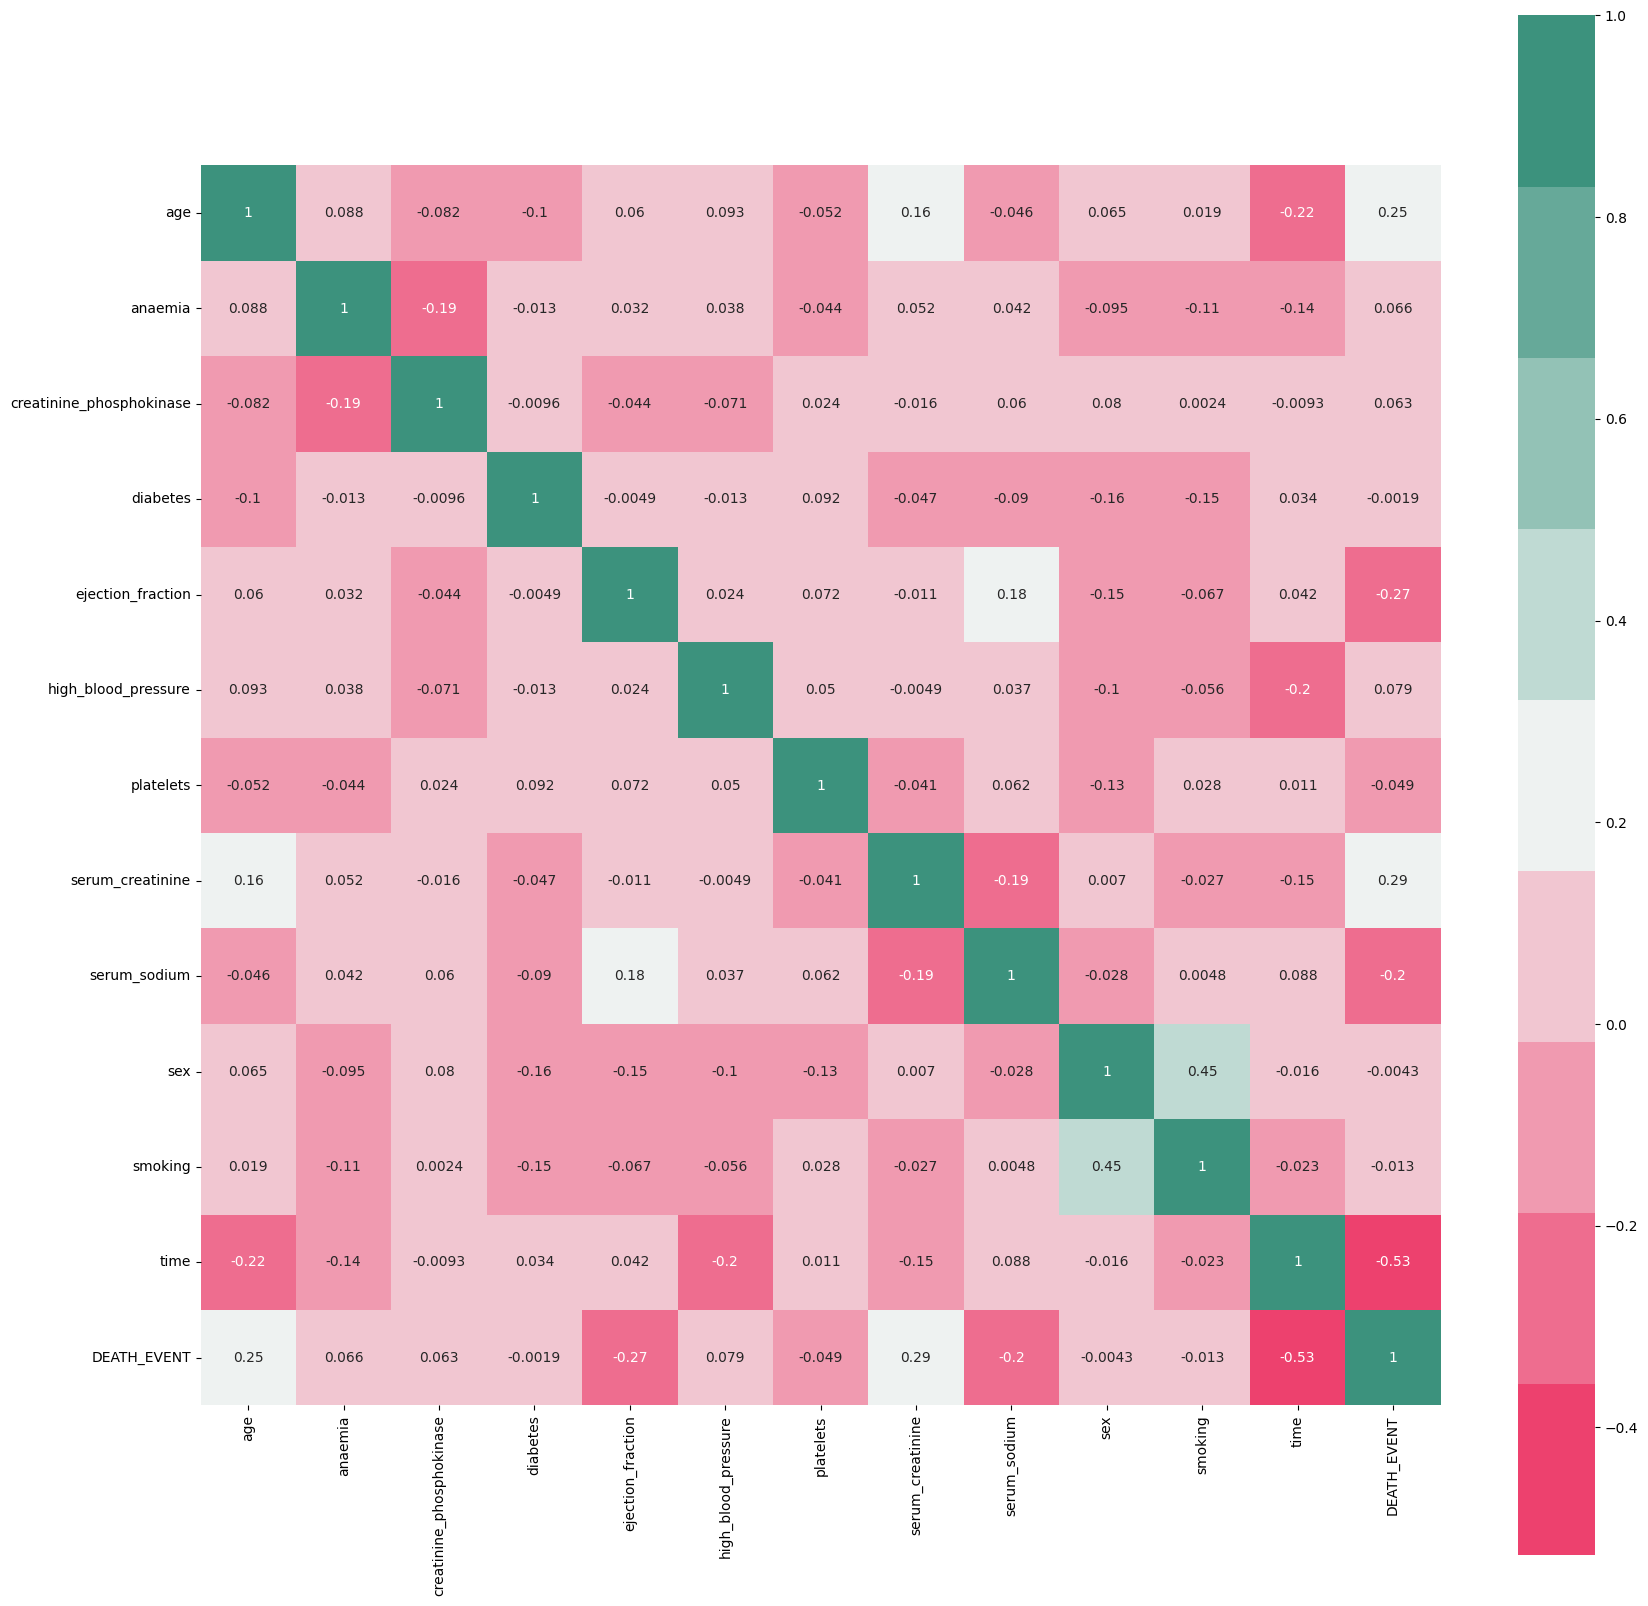

In [12]:
cmap=sns.diverging_palette(2,165,s=80,l=55,n=9)
corrmat=data_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap=cmap,annot=True,square=True)

Text(0.5, 1.0, 'distribution of age')

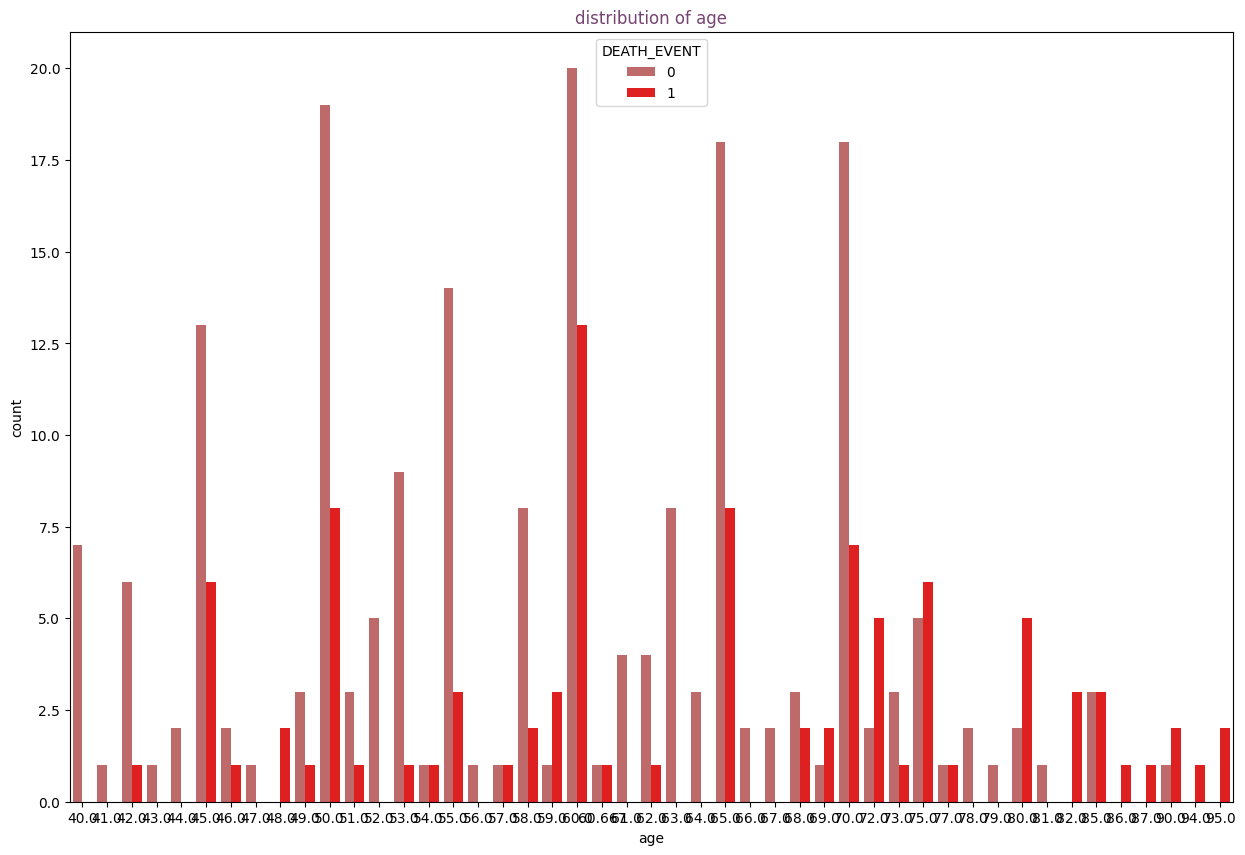

In [13]:
#evaluating age distriution as per deaths happened
plt.figure(figsize=(15,10))
days_of_week=sns.countplot(x=data_df['age'],data=data_df,hue="DEATH_EVENT",palette=cols)
days_of_week.set_title("distribution of age",color="#774571")

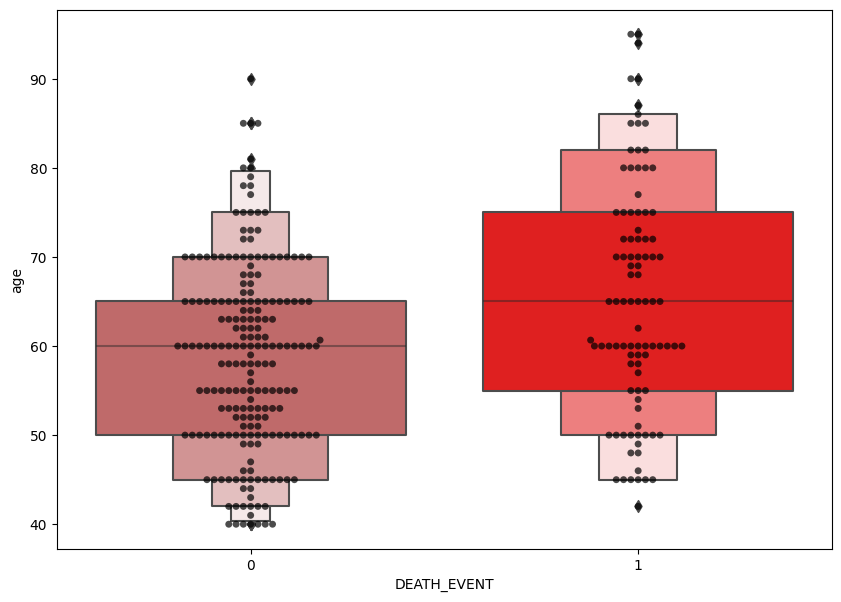

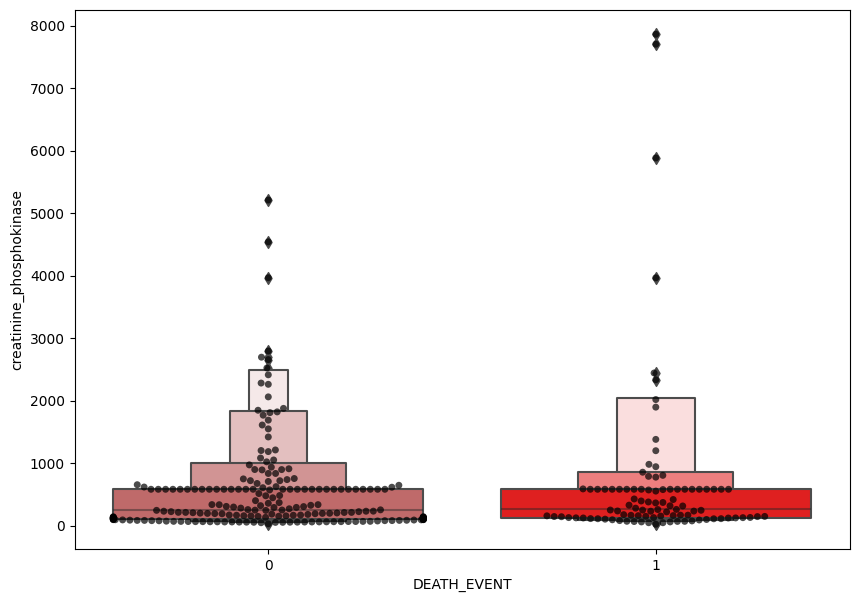

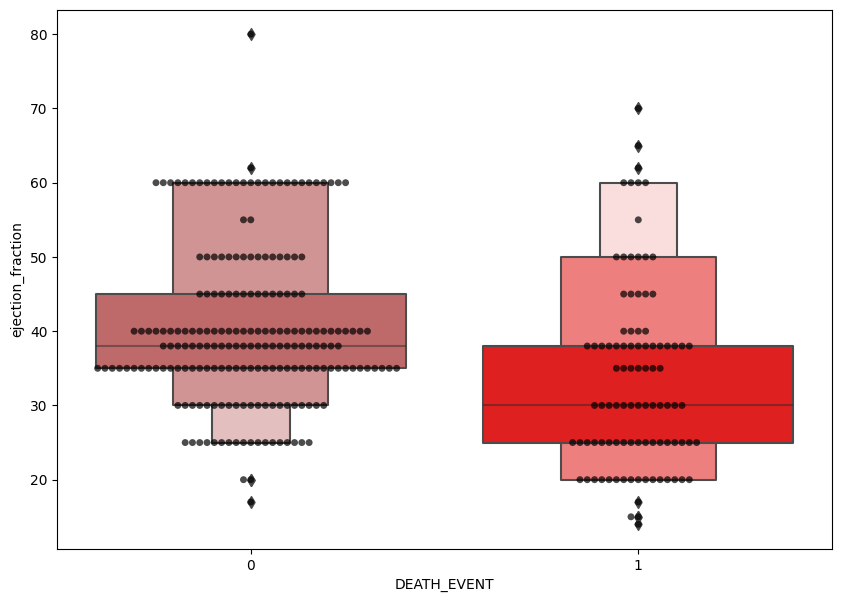

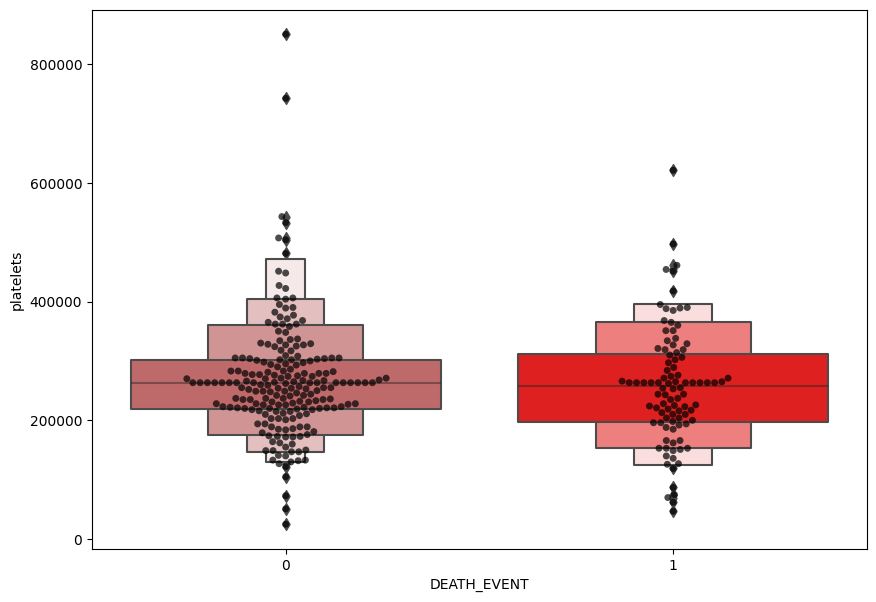

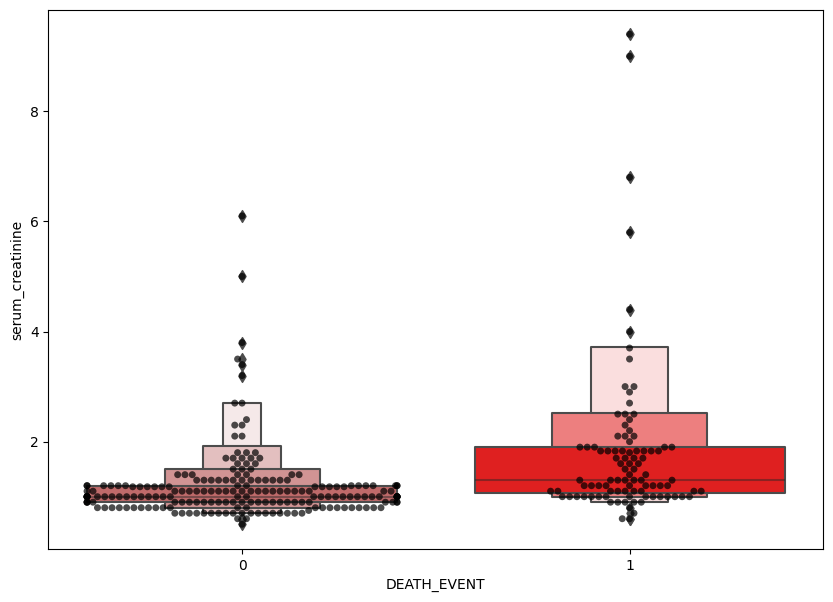

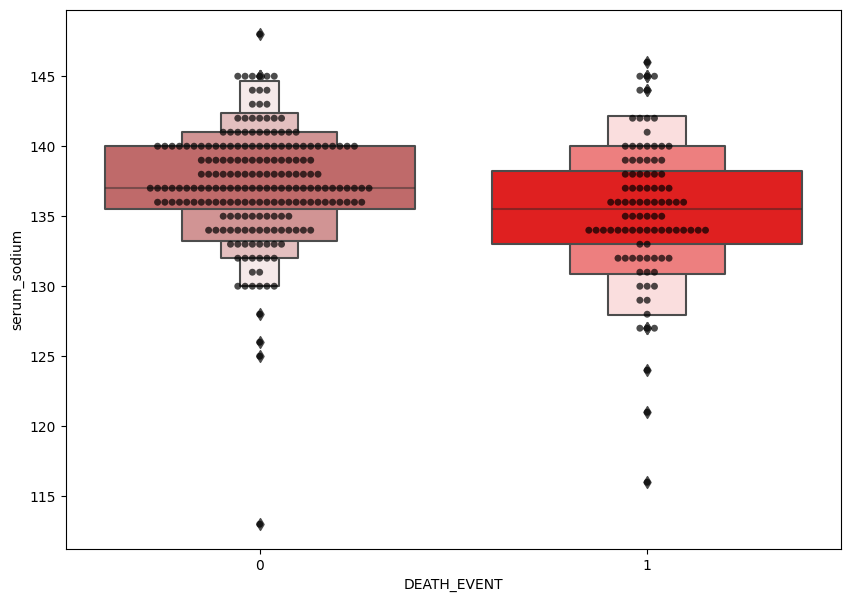

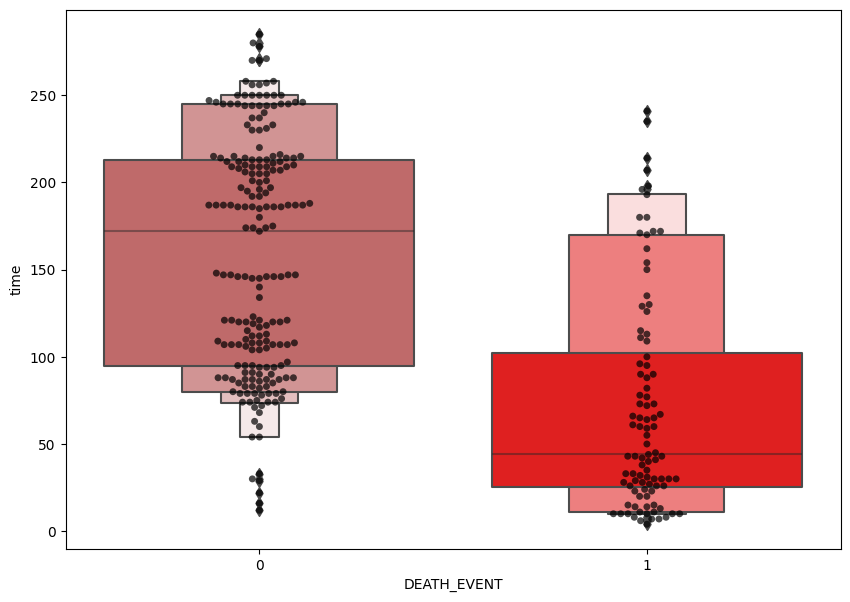

In [14]:
# Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df["DEATH_EVENT"],y=data_df[i],color="black",alpha=0.7)
    sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)
    plt.show()

<AxesSubplot: xlabel='time', ylabel='age'>

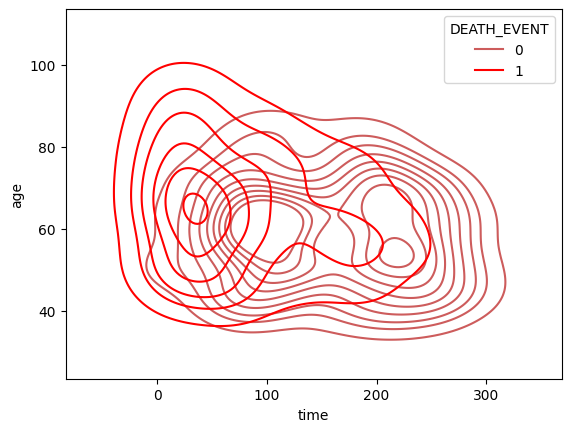

In [15]:
sns.kdeplot(x=data_df["time"],y=data_df["age"],hue=data_df["DEATH_EVENT"],palette=cols)

In [16]:
x=data_df.drop(["DEATH_EVENT"],axis=1)
y=data_df["DEATH_EVENT"]

In [20]:
col_names=list[x.columns]


In [22]:
s_scaler=preprocessing.StandardScaler()


In [24]:
x_scaled=s_scaler.fit_transform(x)


In [25]:
x_scaled=pd.DataFrame(x_scaled,columns=col_names)
x_scaled.describe().T

TypeError: 'types.GenericAlias' object is not iterable

In [28]:
col_names = list(x.columns)
s_scaler = preprocessing.StandardScaler()
x_scaled= s_scaler.fit_transform(x)
x_scaled = pd.DataFrame(X_scaled, columns=col_names)   
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


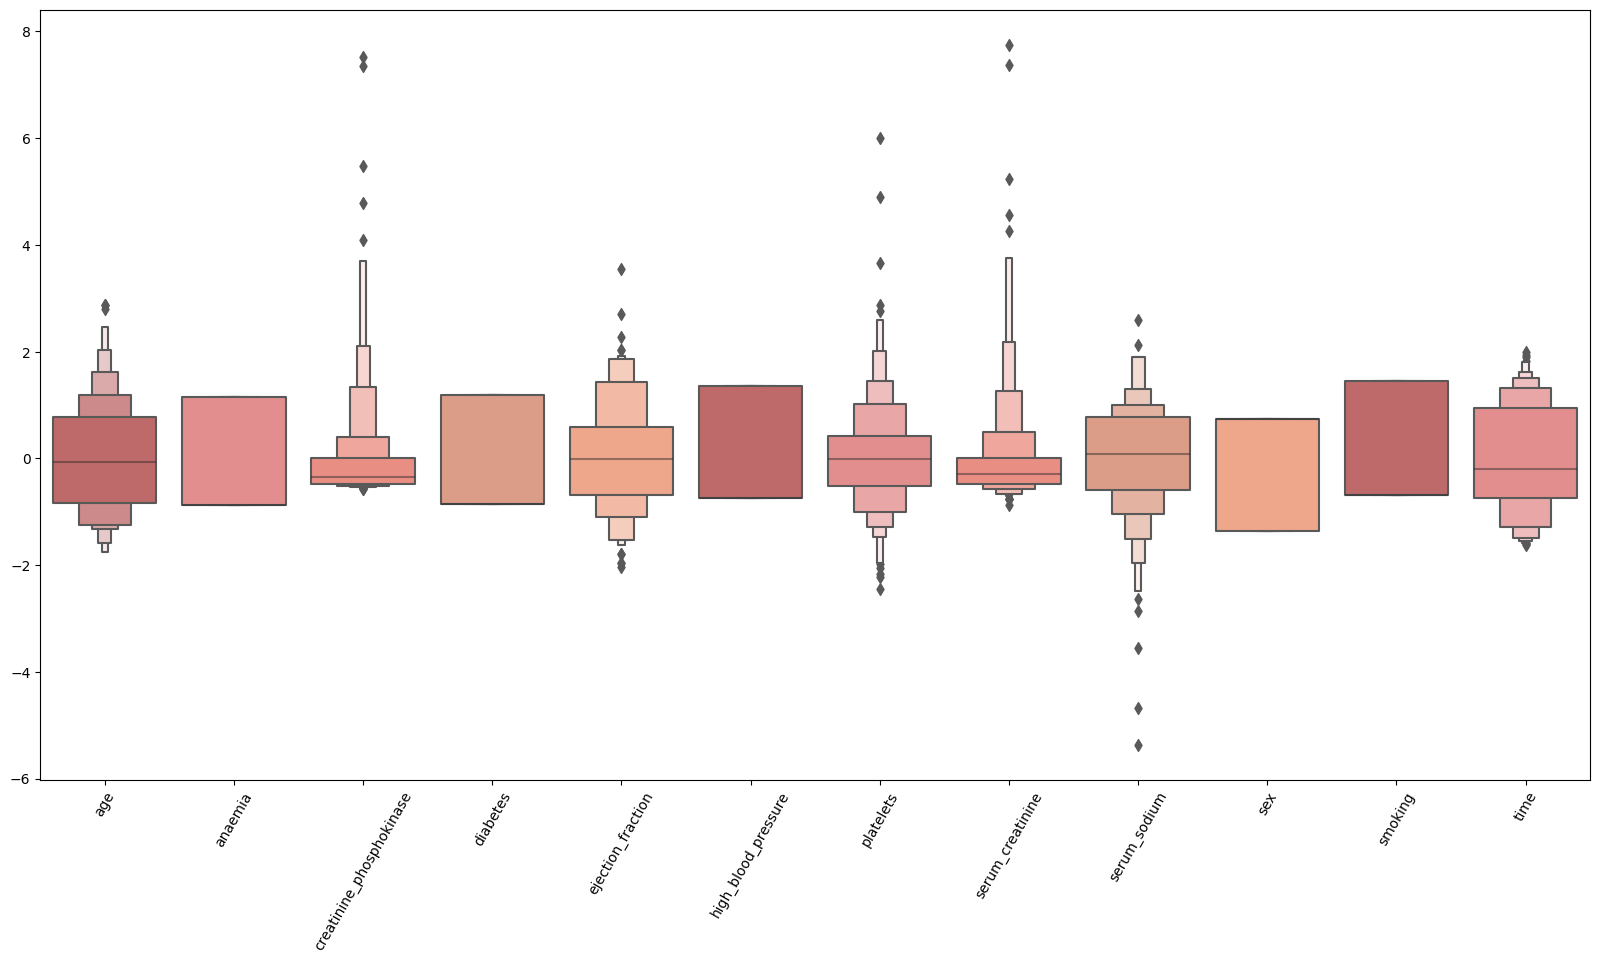

In [29]:
colors=["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
plt.figure(figsize=(20,10))
sns.boxenplot(data=x_scaled,palette=colors)
plt.xticks(rotation=60)
plt.show()

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=25)

In [31]:
#Support vector machine

In [33]:
model1=svm.SVC()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
model1.score(x_test,y_test)

0.7888888888888889

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



<AxesSubplot: >

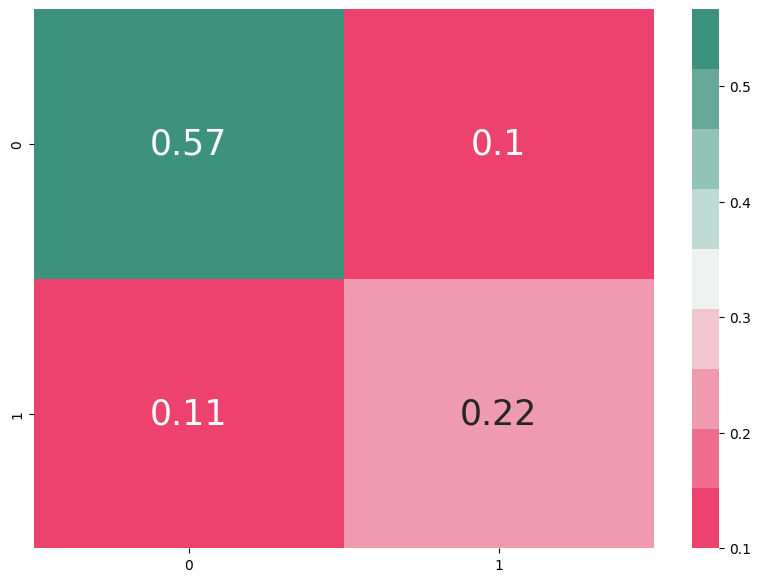

In [35]:
cmap1=sns.diverging_palette(2,165,s=80,l=55,n=9)
plt.subplots(figsize=(10,7))
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),cmap=cmap1,annot=True,annot_kws={"size":25})

In [41]:
#Artificial neural netowrk (ANN)
early_stopping=callbacks.EarlyStopping(
min_delta=0.001,
patience=20,
restore_best_weights=True)

model=Sequential()

model.add(Dense(units=16,kernel_initializer="uniform",activation="relu",input_dim=12))
model.add(Dense(units=8,kernel_initializer="uniform",activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=8,kernel_initializer="uniform",activation="relu"))
model.add(Dropout(0.50))
model.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

history=model.fit(x_train,y_train,batch_size=25,epochs=80,callbacks=[early_stopping],validation_split=0.25)




Epoch 1/80
7/7 [==============================] - 2s 66ms/step - loss: 0.6929 - accuracy: 0.6154 - val_loss: 0.6908 - val_accuracy: 0.8302
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6919 - accuracy: 0.6346 - val_loss: 0.6886 - val_accuracy: 0.8302
Epoch 3/80
7/7 [==============================] - 0s 7ms/step - loss: 0.6909 - accuracy: 0.6346 - val_loss: 0.6862 - val_accuracy: 0.8302
Epoch 4/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6897 - accuracy: 0.6346 - val_loss: 0.6835 - val_accuracy: 0.8302
Epoch 5/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6887 - accuracy: 0.6346 - val_loss: 0.6803 - val_accuracy: 0.8302
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.6871 - accuracy: 0.6346 - val_loss: 0.6772 - val_accuracy: 0.8302
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6856 - accuracy: 0.6346 - val_loss: 0.6736 - val_accuracy: 0.8302
Epoch 8/80
7/7 [================